# ADS Homework #2
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, October 8, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu at anytime (he hangs out at CUSP a lot, so feel free to say hello). Additionally, Professor Savage will hold office hours on Mondays from 9am-12am; a location for this will be confirmed and communicated shortly.

### Problem 1 - PM2.5 Concentration in Beijing (50 points)

**What is a PM2.5?**<br>
“Particulate matter” (PM) is the general term used for a mixture of solid particles and liquid droplets
found in the air. The '2.5' specifies particles with aerodynamic diameters less than or equal to 2.5 microns (μm). This is very small - to put in in perspective, it would take about 30 of these, lined up next to each other, to cover the width of a human hair. They result from a variety of activities, including power plants, motor vehicles, airplanes, residential wood burning, forest fires, agricultural burning, volcanic eruptions (hopefully not something to worry about in NYC) and dust storms.<br>
**Why is this important to cities?**<br>
An extensive body of scientific evidence shows that short- or long-term exposures to fine particles
can cause adverse cardiovascular effects, including heart attacks and strokes resulting in
hospitalizations and, in some cases, premature death. A number of studies have also linked fine
particle exposures to respiratory effects, including the exacerbation of asthma and other respiratory
illnesses (short-term exposures) and the impairment of lung development (long-term exposures). In short, PM2.5 poses public health risks, and is something which cities should be knowledgeable about; predicting when PM2.5 concentration will be particularly high could allow the city to issue warnings or place restrictions on certain activities (e.g. driving, industrial activity, etc.).<br>
**The Data**<br>
We will be looking specifically at Beijing from 2010-2014, using a variety of weather-related variables. Although there exists a time component, and other data sources could be merged to look for additional factors (this could be a great final project - think traffic data, air-taffic data, industrial activity, etc), we will specifically focused on weather for the purposes of this assignment. Please load and take a look at the data below. 

In [83]:
# load libraries; read in data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.api import abline_plot
%matplotlib inline

beijing_pm = pd.read_csv('Beijing_PM2.5.csv')
beijing_pm.head(7)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0


#### Description of Data

The data can be found, along with descriptions, at the following source: http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

**Attribute Information:**<br>
**No:** row number <br>
**year:** year of data in this row <br>
**month:** month of data in this row <br>
**day:** day of data in this row <br>
**hour:** hour of data in this row <br>
**pm2.5:** PM2.5 concentration (ug/m^3) <br>
**DEWP:** Dew Point (â„ƒ) <br>
**TEMP:** Temperature (â„ƒ) <br>
**PRES:** Pressure (hPa) <br>
**cbwd:** Combined wind direction <br>
**Iws:** Cumulated wind speed (m/s) <br>
**Is:** Cumulated hours of snow <br>
**Ir:** Cumulated hours of rain <br>

**1.1)** Data cleaning: As you can see, there are some *n/a* values in our dataframe that need to be removed. Do so, and while you're at it, remove any columns specifying date or time and the wind direction column, as we will not be using these in our analysis. Additionally, decimals should not be used in column names, as this can create problems further down the road - rename 'PM2.5' to simply 'PM25'. (The data are also messy in that the 'I' (i) in the last three columns is indistiguishable from a lower-case 'l' (L) in python's font. Please feel free to rename these to your choosing, however this is not required.) Show the first 5 rows of the cleaned dataset below, then print a descriptive table of the dataset (mean, stdev, etc). **(5 points)**

In [3]:
beijing_pm2= beijing_pm.dropna()

In [4]:
beijing_pm2.columns
## when list the column, I should not use '()'

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [5]:
beijing_pm2.drop(['year', 'month', 'day', 'hour', 'cbwd'],axis=1,inplace=True)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
beijing_pm2 = beijing_pm2.rename(columns = {'Iws':'iws','Is':'ss','Ir':'ir','pm2.5':'pm25'})
beijing_pm2.head(5)

,No,pm25,DEWP,TEMP,PRES,iws,ss,ir
24,25,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,138.0,-7,-5.0,1022.0,6.25,2,0


In [7]:
beijing_pm2.describe()

,No,pm25,DEWP,TEMP,PRES,iws,ss,ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,12658.168415,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,25.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,11464.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,22435.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,33262.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


**1.2)** Take an initial look at the correlations among the variables to get a better intuition for the data. Plot the correlations in a heatmap table using the Seaborn library with the 'seismic' colormap (this provides for clearer visualization, and lets important values "jump out" at you more immediately - it is also comes across as less-scary when showing to non-data scientists). Try to adjust the figure-size so that it is not too compressed. Please include a brief summary of your observations.  **(5 points)**

In [9]:
beijing_pm2.corr()

,No,pm25,DEWP,TEMP,PRES,iws,ss,ir
No,1.000000,-0.017706,0.053953,0.088675,-0.025997,-0.064034,-0.032231,-0.018065
pm25,-0.017706,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
DEWP,0.053953,0.171423,1.000000,0.823821,-0.777722,-0.293106,-0.034925,0.125341
TEMP,0.088675,-0.090534,0.823821,1.000000,-0.826903,-0.149613,-0.094785,0.049544
PRES,-0.025997,-0.047282,-0.777722,-0.826903,1.000000,0.178871,0.070537,-0.080532
iws,-0.064034,-0.247784,-0.293106,-0.149613,0.178871,1.000000,0.022630,-0.009157
ss,-0.032231,0.019266,-0.034925,-0.094785,0.070537,0.022630,1.000000,-0.009764
ir,-0.018065,-0.051369,0.125341,0.049544,-0.080532,-0.009157,-0.009764,1.000000


Text(0.5,1,'Heatmap for variables correlation')

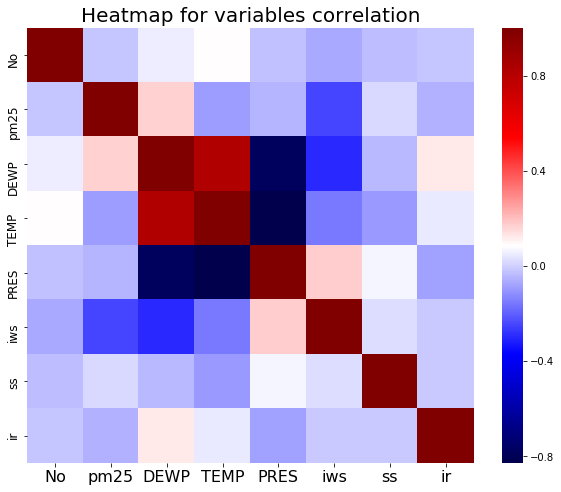

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(beijing_pm2.corr(), fmt="g",cmap='seismic')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title("Heatmap for variables correlation",fontsize=20)

**Summary:** The Pressure has strong negative correlations with both Dew Point and Temperature, so when fitting the PM2.5 concentration models, I will not consider add all three variables. It seems Cumulated wind speed, Cumulated hour of rain, Dew point and temperature all have moderate or strong correlation with PM2.5 concentration.

**1.3)** Using the independant variable with the strongest correlation (note: 'strong' is defined by absolute value) to PM2.5 concentration, run a single variable regression. Print the results, and write a brief interpretation of the R-squared. **(10 points)**

In [11]:
mod = smf.ols(formula = 'pm25 ~ iws', data = beijing_pm2).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2731.
Date:                Fri, 05 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:50:29   Log-Likelihood:            -2.4677e+05
No. Observations:               41757   AIC:                         4.935e+05
Df Residuals:                   41755   BIC:                         4.936e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.5845      0.484    226.280      0.0

**Summary:** The strongest correlation for PM2.5 is cumulated wind speed varieble. The adjusted R-square is only 0.061, which means the variable  can translate 6.1% part of the sample distribution.

**1.4)** Now fit the regression with all of the independant variables. How does the R_squared change? What does this mean? How might colinearity impact our model? **(12 points)**

In [12]:
mod = smf.ols(formula = 'pm25 ~ iws +ir + DEWP + TEMP + PRES + ss', data = beijing_pm2).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     2151.
Date:                Fri, 05 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:50:31   Log-Likelihood:            -2.4247e+05
No. Observations:               41757   AIC:                         4.849e+05
Df Residuals:                   41750   BIC:                         4.850e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1728.4313     72.990     23.680      0.0

**Summary:** R square becomes to 0.236, which is greatly improved, these variables can describe 23.6% of the deviation of PM2.5 concentration.
However, colinearity may let my model 'overfitting', which makes the coefficient of one variable have larger standard deviation and have no realistic meaning.

**1.5)** Run another regression on the data, this time removing the "DEWP" and "PRES" independant variables. What happens to the coefficients for the remaining variables? Why might this be the case? (Hint: look at your correlation table above) **(12 points)**

In [13]:
mod = smf.ols(formula = 'pm25 ~ iws +ir +  TEMP  + ss', data = beijing_pm2).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     913.4
Date:                Fri, 05 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:50:32   Log-Likelihood:            -2.4634e+05
No. Observations:               41757   AIC:                         4.927e+05
Df Residuals:                   41752   BIC:                         4.927e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.8806      0.681    180.543      0.0

**Summary:** Temperate is positively correlated with Dew point and negatively correlated with Pressure. The coefficient of TEMP changed dramatically from  -6.07 to -0.96, the coefficient of ir also change from -7.21 to -3.08. 

**1.6)** Calculate (either in python or by hand) the impact of a one standard deviation increase in *temperature* and a one standard deviation increase in *cumulative wind speed* for the models in **1.4** & **1.5**. **(6 points)**

Answers: the STD deviation of temperature decreases 0.032 and cumulative wind speed increase 0.001.

### Problem 2 - Polynomial Regression (30 points)

In [89]:
# let's create some artificial data
y  = [2.61338821976, 2.17035124741, 0.0495462311938, 1.15825768821, 1.39756687454, 1.77323953196]
x1 = [-0.5, -0.32, -0.14, 0.04, 0.22, 0.4]
df = pd.DataFrame(data=[y, x1], index=(['y', 'x1'])).T
#T means to transpose row and column.
df.head()

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22


**2.1)** Draw a scatter plot of the data (no lines required). Does there seem to be an apparent line of best fit? **(5 points)**

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Scatter of y~x1')

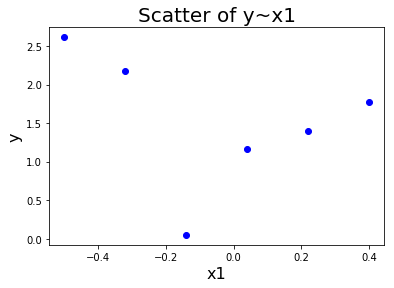

In [90]:
%pylab inline
plt.plot(df['x1'],df['y'], 'o',c='b')
plt.xlabel("x1",fontsize=16)
plt.ylabel("y",fontsize=16)
plt.title("Scatter of y~x1",fontsize=20)

**Summary:** It seems no such apparent line  to fit.

**2.2)** Our dependant variable *y*, in this case, does not appear to be a linear function of *x*. Create new columns in the dataframe for $x^2$, $x^3$, and $x^4$. **(5 points)**

In [91]:
df["x2"] = (df["x1"])**2
df["x3"] = (df["x1"])**3
df["x4"] = (df["x1"])**4
df

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343
5,1.773240,0.40,0.1600,0.064000,0.025600


**2.3)** For each of our polynomials (*x1, x2, x3, x4*), fit a model to *y*. Store and report the R-squared and parameters for each polynomial. Plot the R-squared values in a bar chart to see how they change with the polynomials. Which polynomial seems to be the best fit? Describe why this might be the case. **(10 points)**

In [92]:
'+'.join(list(df.columns[1:5]))
#to get a string in the following fomular, list the index and make it join with"+"

'x1+x2+x3+x4'

In [180]:
rsq = []
mod = []
for i in range(2, 6):
    mod.append(smf.ols(formula='y ~ %s'%('+'.join(list(df.columns[1:i]))), data = df).fit())
    print(mod[i-2].summary())
    rsq.append(mod[i-2].rsquared_adj)
print(rsq)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                 -0.119
Method:                 Least Squares   F-statistic:                    0.4683
Date:                Sun, 14 Oct 2018   Prob (F-statistic):              0.531
Time:                        00:24:12   Log-Likelihood:                -6.9579
No. Observations:                   6   AIC:                             17.92
Df Residuals:                       4   BIC:                             17.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4841      0.391      3.797      0.0

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5,1,'Bar for R-square with different polynomials')

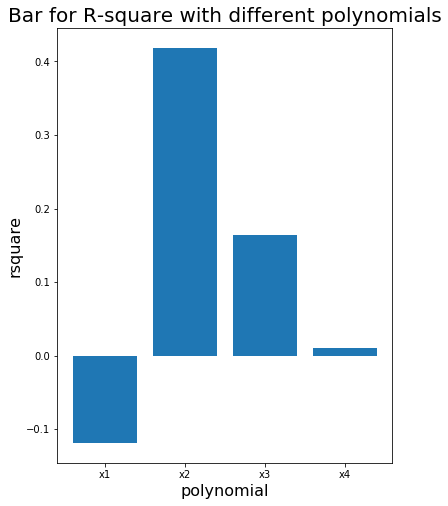

In [94]:
%pylab inline
plt.figure(figsize=(6,8))
plt.bar(['x1','x2','x3','x4'],rsq)
plt.xlabel("polynomial",fontsize=16)
plt.ylabel("rsquare",fontsize=16)
plt.title("Bar for R-square with different polynomials",fontsize=20)

"y~x2" fit the best because the the R-square is the hightest,0.56.

**2.4)** Plot a figure with 4 subfigures, one for each polynomial degree. In each subfigure:<br>
a) Draw the original scatter plot<br>
b) Plot the curve of the true function $f(x) = 9x^2 - x + 1$ (use np.linspace to create a line)<br>
c) Plot your fitted curve for each degree. Observe how our model fits the data as the degree changes.<br>
d) Having done this exercise, why might adding polynomials to our data be useful? What conclusions can we draw from fitting the four polynomials? **(10 points)**

In [181]:
y1 = mod[0].predict(df["x1"])
y2 = mod[1].predict(df[["x1","x2","x3"]])
y3 = mod[2].predict(df[["x1","x2","x3","x4"]])
y4 = mod[3].predict(df[["x1","x2","x3","x4"]])


Populating the interactive namespace from numpy and matplotlib


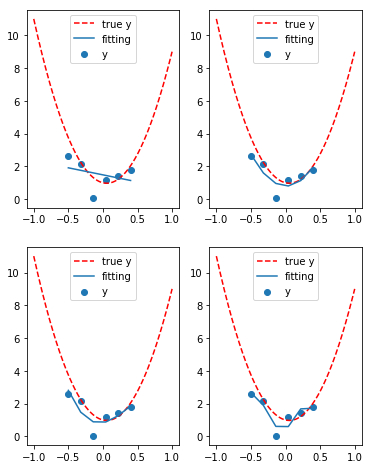

In [183]:
%pylab inline

fig = plt.figure(figsize=(6,8))
ax = []
fit_x = np.linspace(-1,1,1000)
fit_y = 9*(fit_x**2)-fit_x+1
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))
    #abline_plot(model_results=mod[i-1], ax= ax[i-1], color = 'red') has error!!
    ax[i-1].scatter(df['x1'],df['y'])
    ax[i-1].plot(fit_x,fit_y,'--',c='r', label='true y')

ax[0].plot(df[["x1"]], y1,label='fitting')
ax[1].plot(df[["x1"]], y2,label='fitting')
ax[2].plot(df[["x1"]], y3,label='fitting')
ax[3].plot(df[["x1"]], y4,label='fitting')
    
#inter = [1.4841,0.7897,1.4265,1.0713]
#slp = [-0.8588,7.6019,-7.0326,26.9927]


for i in range(4):
#    y_x=slp[i]*(fit_x**(i+1))+inter[i]
#    ax[i].plot(fit_x,y_x,label='fitting')
    ax[i].legend()


Caption: The fitting graghs are using 4 polynominals(x, x**2, x**3, x**4) to fit the model.  A degree with a higher the R-square is most likely to be my fitting model degree.

### Problem 3 - Intro to Normalization (20 points)

This final problem is a brief exercise to explore the effects of normalization. We will be using household data from California, which was derived from the 1990 census. (https://www.kaggle.com/camnugent/california-housing-prices)

In [119]:
housing = pd.read_csv('housing.csv')
housing = housing[['median_income', 'median_house_value']][0:50]
housing.tail()

,median_income,median_house_value
45,2.6768,182300.0
46,2.0260,142500.0
47,1.7348,137500.0
48,0.9506,187500.0
49,1.7750,112500.0


**3.1)** Are there any immediately obvious trends between our two variables? Sort the values by *median_house_value*, then plot the data. Write a brief description of what you see (or, more likely, what you don't see, and why that might be the case). **(10 points)**

In [129]:
housing.sort_values(by=['median_house_value'],ascending=True,inplace=True)
housing.head(10)
housing = housing.reset_index(drop=True)
housing.head(10)

,median_income,median_house_value
0,2.4597,93800.0
1,1.4861,97200.0
2,2.1806,99700.0
3,1.4103,103900.0
4,1.0972,104500.0
5,1.3750,104900.0
6,1.8080,105500.0
7,2.4038,107500.0
8,1.6424,108900.0
9,2.7303,109700.0


Populating the interactive namespace from numpy and matplotlib


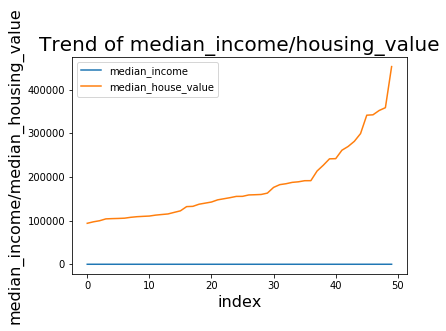

In [140]:
%pylab inline
plt.figure(figsize=(6,4))
plt.plot(housing.index,housing['median_income'])
plt.plot(housing.index,housing['median_house_value'])
plt.xlabel("index",fontsize=16)
plt.ylabel("median_income/median_housing_value",fontsize=16)
plt.title("Trend of median_income/housing_value",fontsize=20)
plt.legend()

**Summary:** There's no correlation between median housing value and median income because the line for Median_income seems to have no slope. This may be because the two variable's sample data has different standards or different means.

**3.2)** Orthonormalize the data so that the *mean* is 0 and the *st_dev* is 1. Write this as a python function that can be fed a dataframe and return an orthonormalized version (this should take no more than 4 lines of code). Plot an orthonormalized version of the housing data that you now have. Write a brief description of how it looks different than in *3.1* and ellaborate breifly on why and in what situations orthonormalization can be useful. **(10 points)**

Populating the interactive namespace from numpy and matplotlib


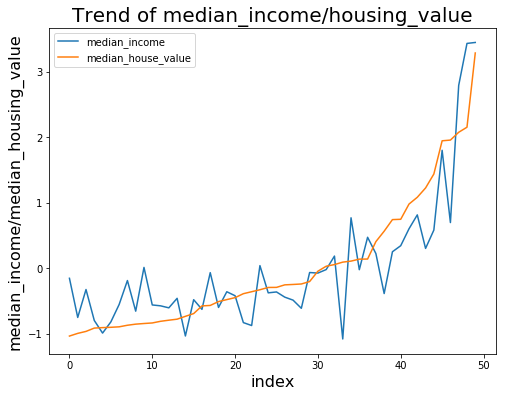

In [208]:
housing['median_house_value']=(housing['median_house_value']-housing['median_house_value'].mean())/housing['median_house_value'].std()
housing['median_income']=(housing['median_income']-housing['median_income'].mean())/housing['median_income'].std()
#Orthonormalization


%pylab inline
plt.figure(figsize=(8,6))
plt.plot(housing.index,housing['median_income'])
plt.plot(housing.index,housing['median_house_value'])
plt.xlabel("index",fontsize=16)
plt.ylabel("median_income/median_housing_value",fontsize=16)
plt.title("Trend of median_income/housing_value",fontsize=20)
plt.legend()

**Summary:** In this graph, the positive correlation between two variables seems strong. This is because I orthonormalized two variebles and eliminate the noisy effect from units and the exact number.